In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')


In [3]:
train_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
test_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)

In [4]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [5]:
(train_df.iloc[0,:186])

0      0.977941
1      0.926471
2      0.681373
3      0.245098
4      0.154412
         ...   
181    0.000000
182    0.000000
183    0.000000
184    0.000000
185    0.000000
Name: 0, Length: 186, dtype: float64

In [6]:
train_df[0][0:186]

0      0.977941
1      0.960114
2      1.000000
3      0.925414
4      0.967136
         ...   
181    1.000000
182    1.000000
183    1.000000
184    1.000000
185    1.000000
Name: 0, Length: 186, dtype: float64

In [7]:
train_df[0]

0        0.977941
1        0.960114
2        1.000000
3        0.925414
4        0.967136
           ...   
87549    0.807018
87550    0.718333
87551    0.906122
87552    0.858228
87553    0.901506
Name: 0, Length: 87554, dtype: float64

In [8]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [9]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= X_train[i,:186]
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [10]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(conv1_1)
    conv2_1=BatchNormalization()(conv2_1)
    drop1=Dropout(0.2)(conv2_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(drop1)
    
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv1_1)
    
    mix=Concatenate([conv2_1,pool2])
    mix
    conv2_1=BatchNormalization()(mix)
    
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(cov2_1)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    return(model)

In [11]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout, Concatenate
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [12]:
def cov_block(a):
    im_shape=(a.shape[1],1)
    inputs_cnn1=Input(shape=(im_shape))
    bn=BatchNormalization()(inputs_cnn1)
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(bn)
    bn=BatchNormalization()(conv1_1)
    drop1=Dropout(0.2)(bn)
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(drop1)
    return conv1_1

In [13]:

    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(conv1_1)
    conv2_1=BatchNormalization()(conv2_1)
    drop1=Dropout(0.2)(conv2_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(drop1)
    
    pool2=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    mix=Concatenate(axis=1)([conv2_1,pool2])
    
    bn=BatchNormalization()(mix)
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(bn)
    bn=BatchNormalization()(conv1_1)
    drop1=Dropout(0.2)(bn)
    mix=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(drop1)
    
    bn=BatchNormalization()(mix)
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(bn)
    bn=BatchNormalization()(conv1_1)
    drop1=Dropout(0.2)(bn)
    mix=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(drop1)
    
    bn=BatchNormalization()(mix)
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(bn)
    bn=BatchNormalization()(conv1_1)
    drop1=Dropout(0.2)(bn)
    mix=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(drop1)
    
    bn=BatchNormalization()(mix)
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(bn)
    bn=BatchNormalization()(conv1_1)
    drop1=Dropout(0.2)(bn)
    mix=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(drop1)
    
    conv2_1=BatchNormalization()(mix)
    flatten=Flatten()(conv2_1)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    model = Model(inputs= inputs_cnn, outputs=main_output)
    

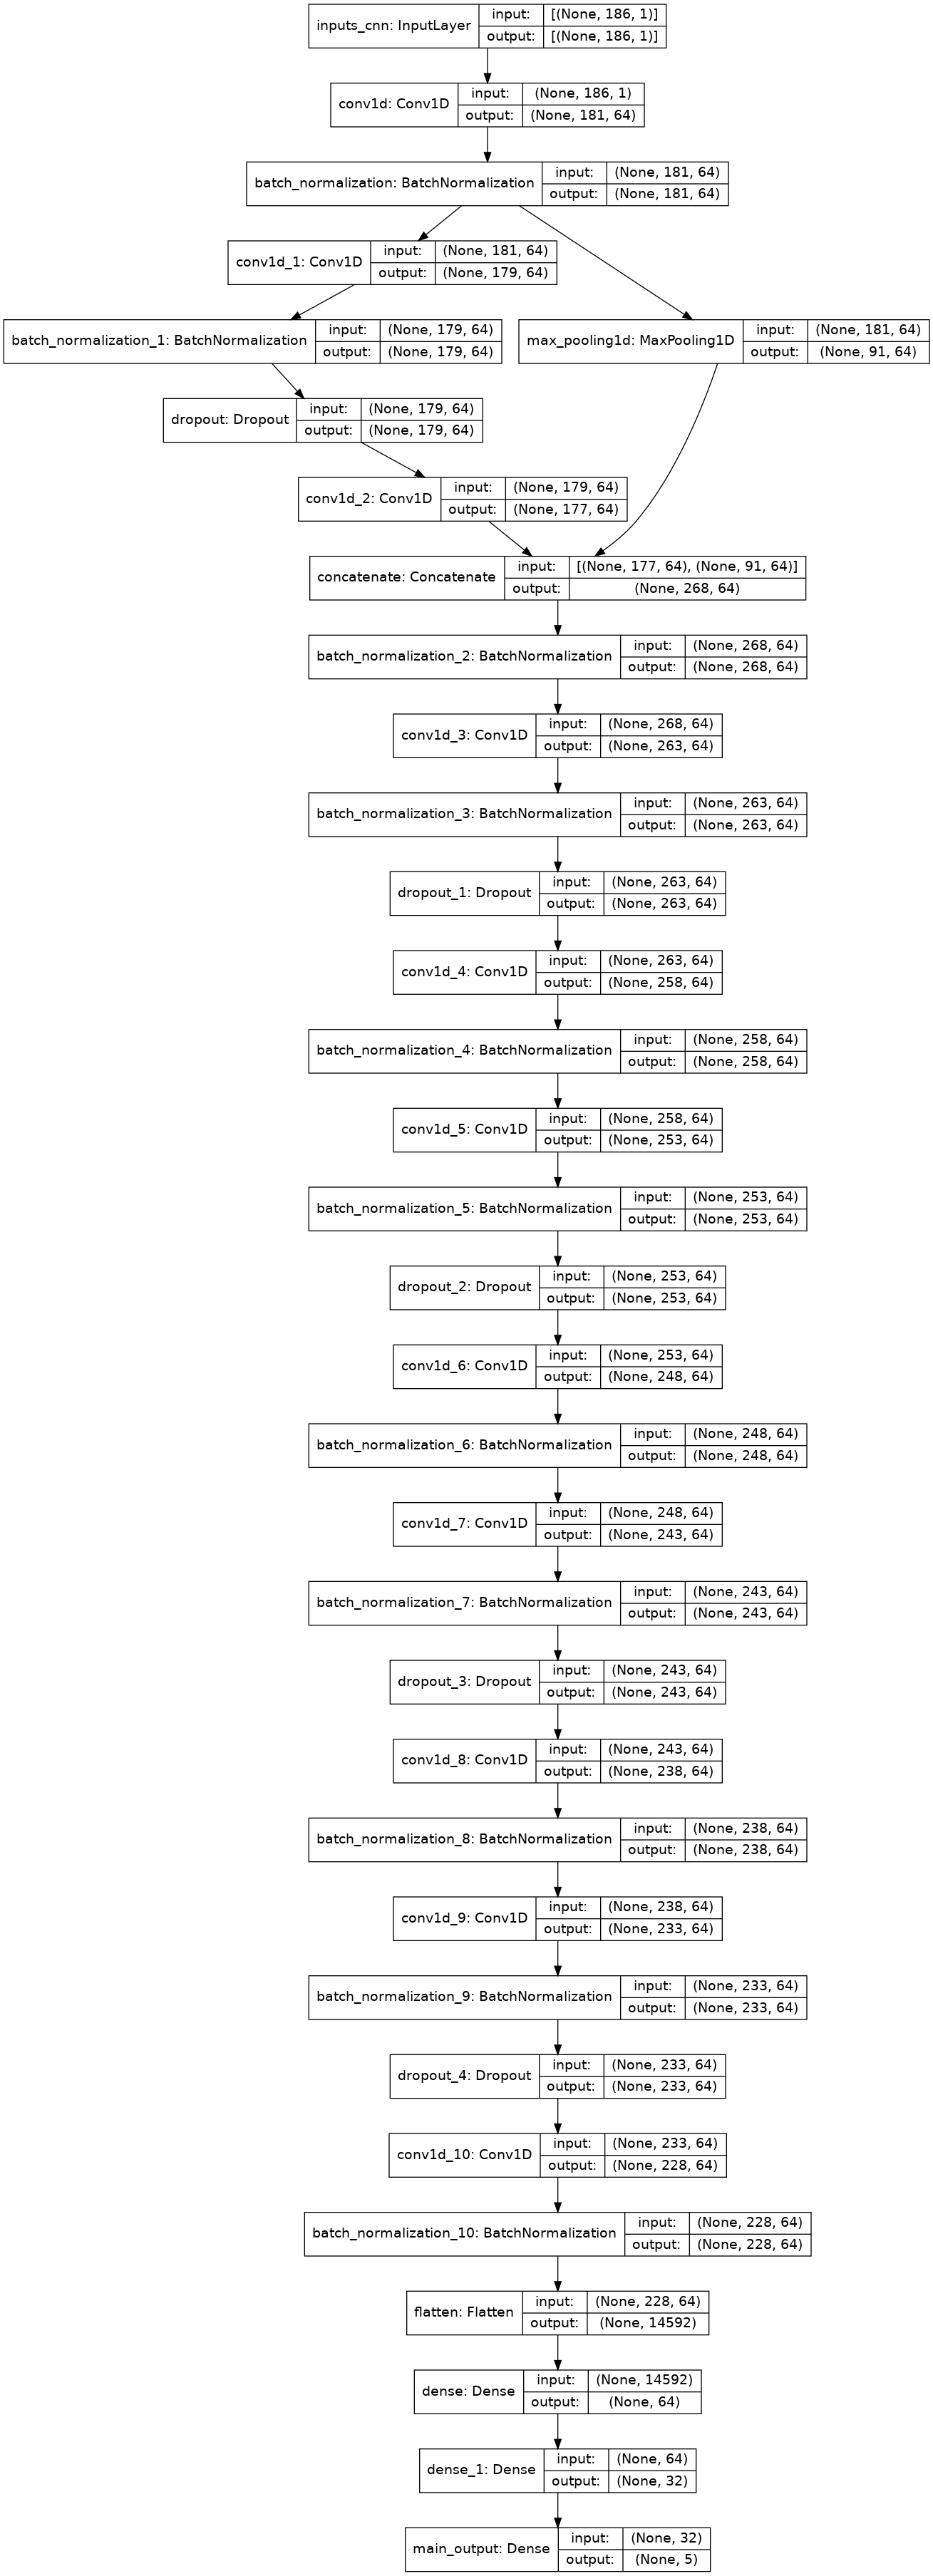

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/kaggle/working/model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_cnn (InputLayer)         [(None, 186, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 181, 64)      448         inputs_cnn[0][0]                 
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 181, 64)      256         conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 179, 64)      12352       batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    from collections import Counter
    counter=Counter(target_train)
    max_val = float(max(counter.values()))  
    class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,class_weight=class_weights,epochs=20, callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    

Epoch 1/20
2737/2737 [==============================] - 50s 15ms/step - loss: 3.8930 - accuracy: 0.5907 - val_loss: 0.5017 - val_accuracy: 0.8150
Epoch 2/20
2737/2737 [==============================] - 41s 15ms/step - loss: 1.8695 - accuracy: 0.7759 - val_loss: 0.3689 - val_accuracy: 0.8930
Epoch 3/20
2737/2737 [==============================] - 41s 15ms/step - loss: 1.8382 - accuracy: 0.7940 - val_loss: 0.7520 - val_accuracy: 0.7693
Epoch 4/20
2737/2737 [==============================] - 41s 15ms/step - loss: 1.3510 - accuracy: 0.8258 - val_loss: 0.4046 - val_accuracy: 0.8615
Epoch 5/20
2737/2737 [==============================] - 41s 15ms/step - loss: 1.1693 - accuracy: 0.8634 - val_loss: 0.3956 - val_accuracy: 0.8657
Epoch 6/20
2737/2737 [==============================] - 41s 15ms/step - loss: 1.1082 - accuracy: 0.8688 - val_loss: 0.5826 - val_accuracy: 0.7804
Epoch 7/20
2737/2737 [==============================] - 41s 15ms/step - loss: 1.0686 - accuracy: 0.8698 - val_loss: 0.3325 -

In [17]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

Accuracy: 95.07%


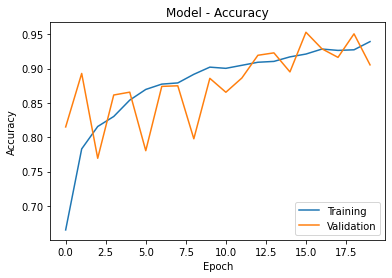

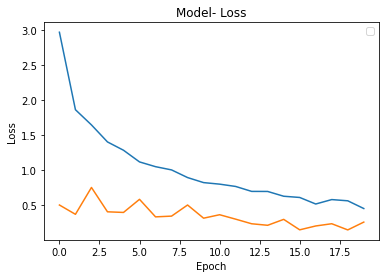

In [18]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)


Normalized confusion matrix


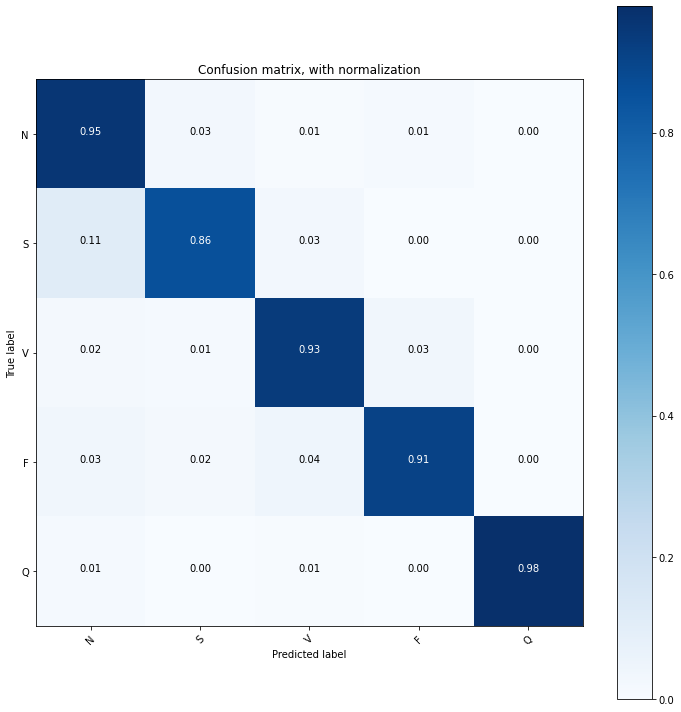

In [19]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()
